In [1]:
import numpy as np 
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from datetime import datetime

import niskine
import mplniw.plot as pl
import gvpy as gv
import mplniw.sigp as sp
import mplniw.utils as ut

In [2]:
conf = niskine.io.load_config()
lon, lat, bottom_depth = niskine.io.mooring_location(mooring=1)
root_dir = '/Users/zcasparcohen/codes/NIW/'
figdir = '/Users/zcasparcohen/Documents/Figures/'

In [3]:
mooring=1
wind_work = xr.open_dataset(root_dir+'data/wind_work/ni_wind_work_niskine_m1.nc')
wind_stress = xr.open_dataset(root_dir+'data/wind_work/wind_stress_niskine_m1.nc')
gridded = xr.open_dataset(root_dir+'data/gridded/M%s_gridded_simple_merge_gaps_filled.nc'%mooring)


In [4]:
if False:
    ds_filtered = sp.ni_bandpass_adcp(gridded)
    ds_filt,wkb = sp.calc_ni_eke(ds_filtered)
    ds_filt['ke'] = 0.5*(ds_filt.u**2+ds_filt.v**2)
    ds_filt['eke'] = 0.5*((ds_filt.u-ds_filt.u.mean())**2+(ds_filt.v-ds_filt.v.mean())**2)
    ds_filt['bpu_wkb'] = ds_filt['bpu']*wkb
    ds_filt['bpv_wkb'] = ds_filt['bpv']*wkb
    ds_filt.ni_eke.attrs.update({'long_name':'Kinetic energy', 'units':r'$m^2.s^{-2}$'})
    ds_filt.bpu_wkb.attrs.update({'long_name':'Zonal velocity', 'units':r'$m.s^{-1}$'})
    ds_filt.bpv_wkb.attrs.update({'long_name':'Meridional velocity', 'units':r'$m.s^{-1}$'})
if True:
    ds_filt = xr.open_dataset(root_dir+'data/M%s_bpfiltered.nc'%mooring)

In [5]:
Tw = 30
lowcut = 2
dt = 1/(24*6)
h = ut.generate_filter('subdiurnal',dt=dt,T=Tw)
h_hat, w = ut.filter_response(h, dt=dt)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


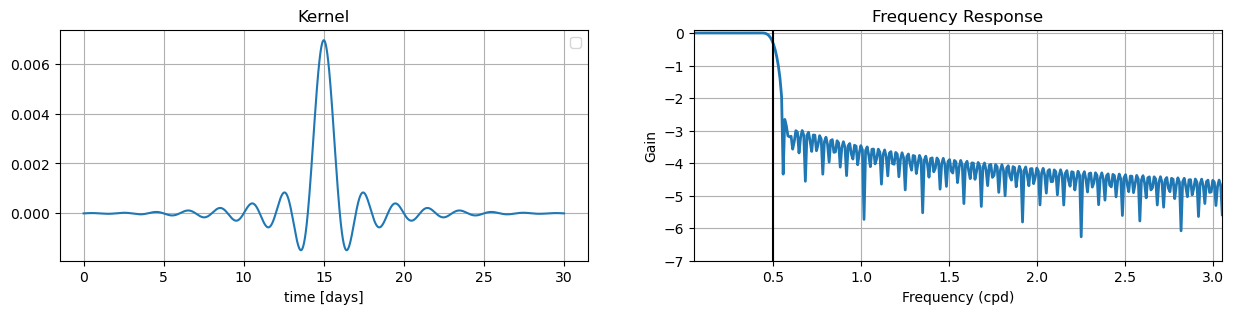

In [6]:
t = np.arange(0,Tw,dt)
fig, axes = plt.subplots(1,2, figsize=(15,3))
ax = axes[0]
ax.plot(t, h)
ax.grid()
ax.set_xlabel('time [days]')
ax.set_title('Kernel')
ax.legend()

ax = axes[1]

ax.plot(w, np.log10(abs(h_hat)), linewidth=2)
ax.axvline(1/lowcut, color='k')
#ax.axvline(fcpd+dband, color='k')
#ax.axvline(1.96, color='grey', ls='--')
ax.set_xlabel('Frequency (cpd)')
ax.set_ylabel('Gain')
ax.set_title('Frequency Response')
#ax.set_ylim(-0.05, 1.05)
ax.set_ylim(-7, 0.1)
ax.set_xlim(0.05, 3.05)
ax.grid(True)

In [7]:
ds = sp.wrap_filter(gridded,h)


(<Figure size 1200x500 with 4 Axes>, <Axes: xlabel='time', ylabel='depth [m]'>)

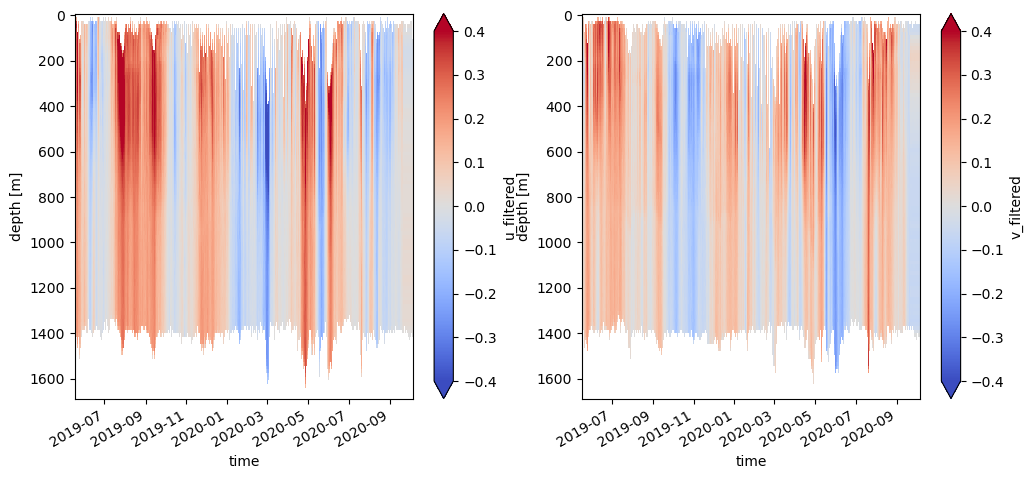

In [10]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(121)
pl.plot_uv(ds,'u_filtered',fig,ax)

ax = fig.add_subplot(122)
pl.plot_uv(ds,'v_filtered',fig,ax)

In [8]:
ds['KE'] = 0.5*((ds['u_filtered']*ds_filt.wkb)**2+(ds['v_filtered']*ds_filt.wkb)**2)
ds['EKE'] = ds_filt.wkb*((ds['u_filtered']-ds['u_filtered'].mean('time'))**2+(ds['v_filtered']-ds['v_filtered'].mean('time'))**2)

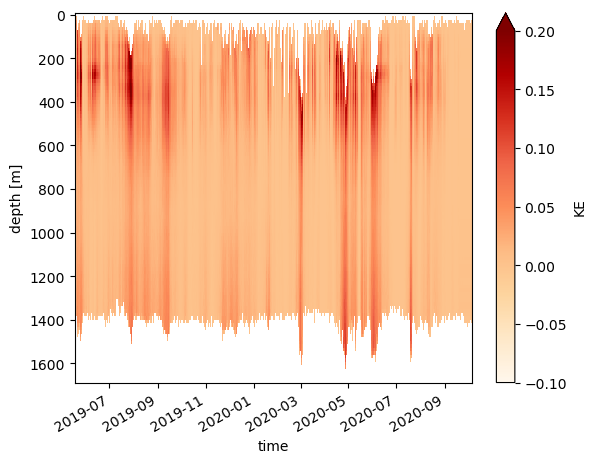

In [9]:
ds.KE.plot(y='z',yincrease=False,vmax=0.2,vmin=-0.1,cmap='OrRd')

In [25]:
ds_filt

<xarray.Dataset>
Dimensions:       (z: 106, time: 72966, adcp: 3)
Coordinates:
  * time          (time) datetime64[ns] 2019-05-17T16:00:00 ... 2020-10-05T08...
  * z             (z) int64 0 16 32 48 64 80 ... 1600 1616 1632 1648 1664 1680
  * adcp          (adcp) int64 3109 9408 13481
Data variables: (12/14)
    u             (z, time) float64 ...
    v             (z, time) float64 ...
    xducer_depth  (adcp, time) float64 ...
    temperature   (adcp, time) float64 ...
    bpu           (z, time) float64 ...
    bpv           (z, time) float64 ...
    ...            ...
    ni_eke        (z, time) float64 ...
    ke            (z, time) float64 ...
    eke           (z, time) float64 ...
    bpu_wkb       (z, time) float64 ...
    bpv_wkb       (z, time) float64 ...
    wkb           (z, time) float64 ...
Attributes:
    project:       NISKINe
    mooring:       M1
    lon:           -21.198829621395166
    lat:           59.101445324829214
    bottom_depth:  2881.0